In [1]:
import torch
import torch.nn as nn

from config import *
from model import CascadedNet, ComplexMLP
from dataset import MyDataset
from trainerFunc import train_ch

In [2]:
func_type = 2
if func_type == 1:
    input_dim = 1
    output_dim = 1
elif func_type == 2:
    input_dim = 2
    output_dim = 1
else:
    input_dim = 2
    output_dim = 2 

In [3]:
dataSet = MyDataset(type=func_type, device=device)
train_iter, test_iter = dataSet.data_iter, dataSet.test_iter

In [4]:
netList = {
    "CascadedNet": CascadedNet(input_dim, subnetwork_params).to(device),
    "MLPNet": nn.Sequential(
        nn.Linear(input_dim, 256),
        nn.ReLU(),
        nn.Linear(256, 512),
        nn.Tanh(),
        nn.Linear(512, 256),
        nn.Tanh(),
        nn.Linear(256, 128),
        nn.SiLU(),  # 更平滑的激活函数（可选项）
        nn.Linear(128, output_dim),
    ).to(device),
    "ComplexMLP": ComplexMLP(input_dim, output_dim, hidden_dims=[1024, 512, 512, 256, 256, 256, 128, 128, 64], dropout=0.2, activation=nn.SiLU()).to(device),
}

In [5]:
# name = "CascadedNet"
# name = "MLPNet"
name = "ComplexMLP"
net = netList[name].to(device)

In [6]:
loss = nn.MSELoss(reduction="none")  # 均方误差
trainer = torch.optim.Adam(net.parameters(), lr=learning_rate)
# torch.nn.utils.clip_grad_norm_(net.parameters(), max_norm=1.0)  # 防止梯度爆炸

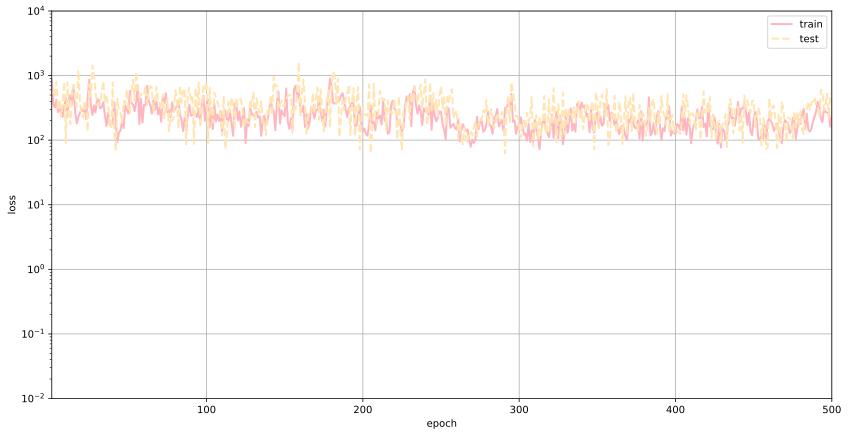

In [8]:
train_ch(net, train_iter, test_iter, loss, num_epochs, trainer)

In [8]:
torch.save(net, f"{name}.pt")